# EE25737: Introduction to Machine Learning
# HW3

### [Mehrsa Pourya]
### [95101247]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

In [2]:
print("Train Data Dimentions : " + str(trainData.shape))
display(trainData.head())
display(trainData.describe())
print("Test Data Dimentions : " + str(testData.shape))
display(testData.head())
display(testData.describe())

Train Data Dimentions : (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Test Data Dimentions : (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


1.1

In [3]:
dataTrain = {'Number of Nulls in Train Data' : trainData.isna().sum()}
display(pd.DataFrame(dataTrain).T)
dataTrain = {'Percentage of Nulls in Train Data' : trainData.isna().sum() / trainData.shape[0] * 100}
display(pd.DataFrame(dataTrain).T)
dataTest = {'Number of Nulls in Test Data' : testData.isna().sum()}
display(pd.DataFrame(dataTest).T)
dataTest = {'Percentage of Nulls in Test Data' : testData.isna().sum() / testData.shape[0] * 100}
display(pd.DataFrame(dataTest).T)
dataTest = {'Percentage of Nulls in Test Data' : testData.isna().sum() / testData.shape[0] * 100}
display(pd.DataFrame(dataTest).T)
mergedData = trainData.append(testData, ignore_index=True, sort=False)
dataMerge = {'Percentage of Nulls in mergedData' : mergedData.drop('Survived', axis = 1).isna().sum() / mergedData.shape[0] * 100}
display(pd.DataFrame(dataMerge).T)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Nulls in Train Data,0,0,0,0,0,177,0,0,0,0,687,2


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Percentage of Nulls in Train Data,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Number of Nulls in Test Data,0,0,0,0,86,0,0,0,1,327,0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Percentage of Nulls in Test Data,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Percentage of Nulls in Test Data,0.0,0.0,0.0,0.0,20.574163,0.0,0.0,0.0,0.239234,78.229665,0.0


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Percentage of Nulls in mergedData,0.0,0.0,0.0,0.0,20.091673,0.0,0.0,0.0,0.076394,77.463713,0.152788


1.2 and 1.3

In [4]:
splitedName1 = trainData['Name'].str.split(', ')
splitedName2 = pd.DataFrame([i[1] for i in splitedName1])[0].str.split('.')
titleTrain = pd.DataFrame({'Title' : [i[0] for i in splitedName2]})
print('Titles for Train Data : ')
display(titleTrain.T.head())
display(pd.DataFrame({'Number of Each Title in Train Data' : titleTrain['Title'].value_counts()}).T)
splitedName1 = testData['Name'].str.split(', ')
splitedName2 = pd.DataFrame([i[1] for i in splitedName1])[0].str.split('.')
titleTest = pd.DataFrame({'Title' : [i[0] for i in splitedName2]})
print('Titles for Test Data : ')
display(titleTest.T.head())
display(pd.DataFrame({'Number of Each Title in Test Data' : titleTest['Title'].value_counts()}).T)
enhancedTitles = {
    "Capt":       "Other",
    "Col":        "Other",
    "Major":      "Other",
    "Jonkheer":   "Other",
    "Don":        "Other",
    "Sir" :       "Other",
    "Dr":         "Other",
    "Rev":        "Other",
    "the Countess":"Other",
    "Dona":       "Other",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Other"
}
newTrainTitle = pd.DataFrame({'Title' : titleTrain['Title'].map(enhancedTitles)})
display(pd.DataFrame({'Number of Each newTitle in Train Data' : newTrainTitle['Title'].value_counts()}).T)
newTestTitle = pd.DataFrame({'Title' : titleTest['Title'].map(enhancedTitles)})
display(pd.DataFrame({'Number of Each newTitle in Test Data' : newTestTitle['Title'].value_counts()}).T)
trainData['Title'] = titleTrain['Title']
trainData['myTitle'] = newTrainTitle['Title']
testData['Title'] = titleTest['Title']
testData['myTitle'] = newTestTitle['Title']
mergedData = trainData.append(testData, ignore_index=True, sort=False)
display(trainData.head())
display(testData.head())

Titles for Train Data : 


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
Title,Mr,Mrs,Miss,Mrs,Mr,Mr,Mr,Master,Mrs,Mrs,...,Mr,Miss,Mr,Mr,Mrs,Rev,Miss,Miss,Mr,Mr


,Mr,Miss,Mrs,Master,Dr,Rev,Col,Major,Mlle,the Countess,Capt,Ms,Don,Lady,Sir,Mme,Jonkheer
Number of Each Title in Train Data,517,182,125,40,7,6,2,2,2,1,1,1,1,1,1,1,1


Titles for Test Data : 


,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
Title,Mr,Mrs,Mr,Mr,Mrs,Mr,Miss,Mr,Mrs,Mr,...,Miss,Miss,Miss,Mrs,Miss,Mr,Dona,Mr,Mr,Master


,Mr,Miss,Mrs,Master,Rev,Col,Ms,Dona,Dr
Number of Each Title in Test Data,240,78,72,21,2,2,1,1,1


,Mr,Miss,Mrs,Master,Other
Number of Each newTitle in Train Data,517,184,127,40,23


,Mr,Miss,Mrs,Master,Other
Number of Each newTitle in Test Data,240,78,73,21,6


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Mrs


1.4

In [5]:
print('mean of Age in each Real Title for train data:')
g1 = trainData.groupby(['Title'])
display(pd.DataFrame(g1.Age.mean()).T)
g2 = trainData.groupby(['myTitle'])
print('mean of Age in each myTitle for train data:')
display(pd.DataFrame(g2.Age.mean()).T)
g3 = testData.groupby(['Title'])
print('mean of Age in each Real Title for test data:')
display(pd.DataFrame(g3.Age.mean()).T)
g4 = testData.groupby(['myTitle'])
print('mean of Age in each myTitle for test data:')
display(pd.DataFrame(g4.Age.mean()).T)
g5 = mergedData.groupby(['myTitle'])
print('mean of Age in each myTitle for merged data:')
display(pd.DataFrame(g5.Age.mean()).T)
trainData.Age = g2.Age.apply(lambda x: x.fillna(x.mean()))
testData.Age = g4.Age.apply(lambda x: x.fillna(x.mean()))
mergedData.Age = g5.Age.apply(lambda x: x.fillna(x.mean()))
trainData['myAge'] = mergedData['Age'][0:len(trainData)].values
testData['myAge'] = mergedData['Age'][len(trainData):(len(mergedData))].values
display(trainData[0:9])
display(testData[0:9])

mean of Age in each Real Title for train data:


Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Age,70.0,58.0,40.0,42.0,38.0,48.0,48.5,4.574167,21.773973,24.0,24.0,32.36809,35.898148,28.0,43.166667,49.0,33.0


mean of Age in each myTitle for train data:


myTitle,Master,Miss,Mr,Mrs,Other
Age,4.574167,21.804054,32.36809,35.718182,45.545455


mean of Age in each Real Title for test data:


Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Age,50.0,39.0,53.0,7.406471,21.774844,32.0,38.903226,NaN,35.5


mean of Age in each myTitle for test data:


myTitle,Master,Miss,Mr,Mrs,Other
Age,7.406471,21.774844,32.0,38.903226,43.833333


mean of Age in each myTitle for merged data:


myTitle,Master,Miss,Mr,Mrs,Other
Age,5.482642,21.795236,32.252151,36.866279,45.178571


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle,myAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Mrs,Mrs,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S,Mr,Mr,35.000000
5,6,0,3,"Moran, Mr. James",male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,Mr,32.252151
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E46,S,Mr,Mr,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,NaN,S,Master,Master,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,NaN,S,Mrs,Mrs,27.000000


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle,myAge
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,Mrs,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,Mr,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,Mr,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,Mrs,22.0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr,Mr,14.0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss,Miss,30.0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr,Mr,26.0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs,Mrs,18.0


1.5

Train Data :


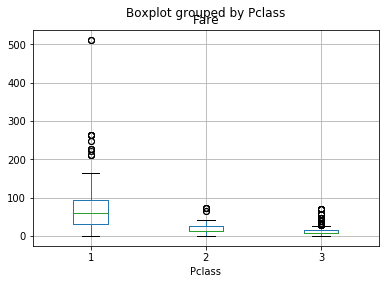

Test Data:


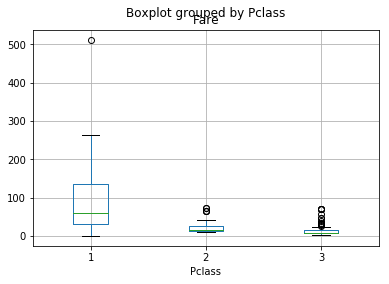

Merged Data:


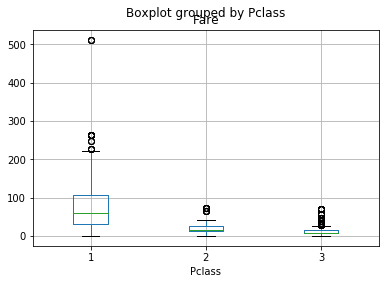

Train Data :


Pclass,1,2,3
Fare,84.154687,20.662183,13.67555


Test Data :


Pclass,1,2,3
Fare,94.280297,22.202104,12.459678


Merged Data:


Pclass,1,2,3
Fare,87.508992,21.179196,13.302889


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle,myAge,myFare
100,101,0,3,"Petranec, Miss. Matilda",female,28.00000,0,0,349245,7.8958,NaN,S,Miss,Miss,28.000000,7.8958
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,32.36809,0,0,349215,7.8958,NaN,S,Mr,Mr,32.252151,7.8958
102,103,0,1,"White, Mr. Richard Frasar",male,21.00000,0,1,35281,77.2875,D26,S,Mr,Mr,21.000000,77.2875
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.00000,0,0,7540,8.6542,NaN,S,Mr,Mr,33.000000,8.6542
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.00000,2,0,3101276,7.9250,NaN,S,Mr,Mr,37.000000,7.9250


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle,myAge,myFare
100,992,1,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",female,43.0,1,0,11778,55.4417,C116,C,Mrs,Mrs,43.000000,55.4417
101,993,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26,NaN,S,Mr,Mr,27.000000,26.0000
102,994,3,"Foley, Mr. William",male,32.0,0,0,365235,7.75,NaN,Q,Mr,Mr,32.252151,7.7500
103,995,3,"Johansson Palmquist, Mr. Oskar Leander",male,26.0,0,0,347070,7.775,NaN,S,Mr,Mr,26.000000,7.7750
104,996,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C,Mrs,Mrs,16.000000,8.5167


In [6]:
print('Train Data :')
plt.show(trainData.boxplot(column = 'Fare' ,by = 'Pclass'))
print('Test Data:')
plt.show(testData.boxplot(column = 'Fare' ,by = 'Pclass'))
print('Merged Data:')
plt.show(mergedData.boxplot(column = 'Fare' ,by = 'Pclass'))
#trainData['Fare'].replace(0, np.nan, inplace = True)
#testData['Fare'].replace(0, np.nan, inplace = True)
#mergedData['Fare'].replace(0, np.nan, inplace = True)
mg = mergedData.groupby('Pclass')
print('Train Data :')
display(pd.DataFrame(trainData.groupby('Pclass').Fare.mean()).T)
print('Test Data :')
display(pd.DataFrame(testData.groupby('Pclass').Fare.mean()).T)
print('Merged Data:')
display(pd.DataFrame(mg.Fare.mean()).T)
trainData.Fare = trainData.groupby('Pclass').Fare.apply(lambda x : x.fillna(x.mean))
testData.Fare = testData.groupby('Pclass').Fare.apply(lambda x : x.fillna(x.mean))
mergedData.Fare = mg.Fare.apply(lambda x: x.fillna(x.mean()))
trainData['myFare'] = mergedData['Fare'][0:len(trainData)].values
testData['myFare'] = mergedData['Fare'][len(trainData):(len(mergedData))].values
display(trainData[100:105])
display(testData[100:105])

1.6

In [7]:
eLabels = mergedData['Embarked'].unique()
trainData['Embarked'].fillna(value=trainData['Embarked'].mode()[0], inplace=True)
testData['Embarked'].fillna(value=testData['Embarked'].mode()[0], inplace=True)
mergedData['Embarked'].fillna(value=mergedData['Embarked'].mode()[0], inplace=True)
trainDatan = pd.get_dummies(trainData, columns=["Embarked"])
testDatan = pd.get_dummies(testData, columns=["Embarked"])
mergedDatan = pd.get_dummies(mergedData, columns=["Embarked"])
print('Embarked Groups:' , eLabels)
sLabels = mergedData['Sex'].unique()
print('Sex groups :' , sLabels)
dic = {sLabels[0] : 0, sLabels[1] : 1}
sVals = trainDatan['Sex'].map(dic).values
trainDatan['sex_num'] = sVals
sVals = testDatan['Sex'].map(dic).values
testDatan['sex_num'] = sVals
sVals = mergedDatan['Sex'].map(dic).values
mergedDatan['sex_num'] = sVals
mergedDatan.head()
tLabels = mergedData['myTitle'].unique()
print('myTitle groups :' , tLabels)
trainDatan = pd.get_dummies(trainDatan, columns=["myTitle"])
testDatan = pd.get_dummies(testDatan, columns=["myTitle"])
mergedDatan = pd.get_dummies(mergedDatan, columns=["myTitle"])
display(mergedDatan.head())

Embarked Groups: ['S' 'C' 'Q' nan]
Sex groups : ['male' 'female']
myTitle groups : ['Mr' 'Mrs' 'Miss' 'Master' 'Other']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Embarked_C,Embarked_Q,Embarked_S,sex_num,myTitle_Master,myTitle_Miss,myTitle_Mr,myTitle_Mrs,myTitle_Other
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,0,0,1,0,0,0,1,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,1,0,0,1,0,0,0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,0,0,1,1,0,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,0,0,1,1,0,0,0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,1,0,0,0,1,0,0


my old code for categorical to numeric, which i found it doesn't make sense, the above is replaced :). 

In [8]:
'''trainData['Embarked'].fillna(value=trainData['Embarked'].mode()[0], inplace=True)
testData['Embarked'].fillna(value=testData['Embarked'].mode()[0], inplace=True)
mergedData['Embarked'].fillna(value=mergedData['Embarked'].mode()[0], inplace=True)
eLabels = mergedData['Embarked'].unique()
print(eLabels)
dic = {eLabels[0] : 0, eLabels[1] : 1, eLabels[2] : 2}
eVals = trainData['Embarked'].map(dic).values
e = np.array([])
for i in eVals: 
    e = np.append(e,format(int(i), 'b').zfill(2))
e1 = [int(i[0]) for i in e]
e0 = [int(i[1]) for i in e]
trainData['embarked1'] = e1
trainData['embarked0'] = e0
eVals = testData['Embarked'].map(dic).values
e = np.array([])
for i in eVals: 
    e = np.append(e,format(int(i), 'b').zfill(2))
e1 = [int(i[0]) for i in e]
e0 = [int(i[1]) for i in e]
testData['embarked1'] = e1
testData['embarked0'] = e0
eVals = mergedData['Embarked'].map(dic).values
e = np.array([])
for i in eVals: 
    e = np.append(e,format(int(i), 'b').zfill(2))
e1 = [int(i[0]) for i in e]
e0 = [int(i[1]) for i in e]
mergedData['embarked1'] = e1
mergedData['embarked0'] = e0

sLabels = mergedData['Sex'].unique()
print(sLabels)
dic = {sLabels[0] : 0, sLabels[1] : 1}
sVals = trainData['Sex'].map(dic).values
trainData['sex_num'] = sVals
sVals = testData['Sex'].map(dic).values
testData['sex_num'] = sVals
sVals = mergedData['Sex'].map(dic).values
mergedData['sex_num'] = sVals

tLabels = mergedData['myTitle'].unique()
print(tLabels)
dic = {tLabels[0] : 0,tLabels[1] : 1, tLabels[2] : 2}
tVals = trainData['myTitle'].map(dic).values
t = np.array([])
for i in tVals: 
    t = np.append(t,format(int(i), 'b').zfill(2))
t1 = [int(i[0]) for i in t]
t0 = [int(i[1]) for i in t]
trainData['myTitle1'] = t1
trainData['myTitle0'] = t0
tVals = testData['myTitle'].map(dic).values
t = np.array([])
for i in tVals: 
    t = np.append(t,format(int(i), 'b').zfill(2))
t1 = [int(i[0]) for i in t]
t0 = [int(i[1]) for i in t]
testData['myTitle1'] = t1
testData['myTitle0'] = t0
tVals = mergedData['myTitle'].map(dic).values
t = np.array([])
for i in tVals: 
    t = np.append(t,format(int(i), 'b').zfill(2))
t1 = [int(i[0]) for i in t]
t0 = [int(i[1]) for i in t]
mergedData['myTitle1'] = t1
mergedData['myTitle0'] = t0 '''
print(' ')

1.7

In [9]:
mergedDatan = mergedDatan.drop('Name', axis = 1)
mergedDatan = mergedDatan.drop('Ticket', axis = 1)
mergedDatan = mergedDatan.drop('Sex', axis = 1)
display(mergedDatan.head())
trainDatan = trainDatan.drop('Name', axis = 1)
trainDatan = trainDatan.drop('Ticket', axis = 1)
trainDatan = trainDatan.drop('Sex', axis = 1)
display(trainDatan.head())
testDatan = testDatan.drop('Name', axis = 1)
testDatan = testDatan.drop('Ticket', axis = 1)
testDatan = testDatan.drop('Sex', axis = 1)
display(testDatan.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,Embarked_C,Embarked_Q,Embarked_S,sex_num,myTitle_Master,myTitle_Miss,myTitle_Mr,myTitle_Mrs,myTitle_Other
0,1,0.0,3,22.0,1,0,7.2500,NaN,Mr,0,0,1,0,0,0,1,0,0
1,2,1.0,1,38.0,1,0,71.2833,C85,Mrs,1,0,0,1,0,0,0,1,0
2,3,1.0,3,26.0,0,0,7.9250,NaN,Miss,0,0,1,1,0,1,0,0,0
3,4,1.0,1,35.0,1,0,53.1000,C123,Mrs,0,0,1,1,0,0,0,1,0
4,5,0.0,3,35.0,0,0,8.0500,NaN,Mr,0,0,1,0,0,0,1,0,0


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,myAge,myFare,Embarked_C,Embarked_Q,Embarked_S,sex_num,myTitle_Master,myTitle_Miss,myTitle_Mr,myTitle_Mrs,myTitle_Other
0,1,0,3,22.0,1,0,7.2500,NaN,Mr,22.0,7.2500,0,0,1,0,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,C85,Mrs,38.0,71.2833,1,0,0,1,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,NaN,Miss,26.0,7.9250,0,0,1,1,0,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,C123,Mrs,35.0,53.1000,0,0,1,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,NaN,Mr,35.0,8.0500,0,0,1,0,0,0,1,0,0


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,myAge,myFare,Embarked_C,Embarked_Q,Embarked_S,sex_num,myTitle_Master,myTitle_Miss,myTitle_Mr,myTitle_Mrs,myTitle_Other
0,892,3,34.5,0,0,7.8292,NaN,Mr,34.5,7.8292,0,1,0,0,0,0,1,0,0
1,893,3,47.0,1,0,7,NaN,Mrs,47.0,7.0000,0,0,1,1,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,NaN,Mr,62.0,9.6875,0,1,0,0,0,0,1,0,0
3,895,3,27.0,0,0,8.6625,NaN,Mr,27.0,8.6625,0,0,1,0,0,0,1,0,0
4,896,3,22.0,1,1,12.2875,NaN,Mrs,22.0,12.2875,0,0,1,1,0,0,0,1,0


2

In [10]:
t1 = [trainData['Parch'].mean(), trainData['Parch'].median() ,
      trainData['Parch'].mode()[0], trainData['Parch'].var()]
s1 = [trainData.groupby('Survived').Parch.mean()[0], trainData.groupby('Survived').Parch.median()[0], 
     trainData.groupby('Survived').Parch.apply(lambda x: x.mode()[0])[0], 
     trainData.groupby('Survived').Parch.var()[0]]
n1 = [trainData.groupby('Survived').Parch.mean()[1], trainData.groupby('Survived').Parch.median()[1], 
     trainData.groupby('Survived').Parch.apply(lambda x: x.mode()[0])[1], 
     trainData.groupby('Survived').Parch.var()[1]]
t2 = [trainData['SibSp'].mean(), trainData['SibSp'].median() ,
      trainData['SibSp'].mode()[0], trainData['SibSp'].var()]
s2 = [trainData.groupby('Survived').SibSp.mean()[0], trainData.groupby('Survived').SibSp.median()[0], 
     trainData.groupby('Survived').SibSp.apply(lambda x: x.mode()[0])[0], 
     trainData.groupby('Survived').SibSp.var()[0]]
n2 = [trainData.groupby('Survived').SibSp.mean()[1], trainData.groupby('Survived').SibSp.median()[1], 
     trainData.groupby('Survived').SibSp.apply(lambda x: x.mode()[0])[1], 
     trainData.groupby('Survived').SibSp.var()[1]]
t3 = [trainDatan['sex_num'].mean(), trainDatan['sex_num'].median() ,
      trainDatan['sex_num'].mode()[0], trainDatan['sex_num'].var()]
s3 = [trainDatan.groupby('Survived').sex_num.mean()[0], trainDatan.groupby('Survived').sex_num.median()[0], 
     trainDatan.groupby('Survived').sex_num.apply(lambda x: x.mode()[0])[0], 
     trainDatan.groupby('Survived').sex_num.var()[0]]
n3 = [trainDatan.groupby('Survived').sex_num.mean()[1], trainDatan.groupby('Survived').sex_num.median()[1], 
     trainDatan.groupby('Survived').sex_num.apply(lambda x: x.mode()[0])[1], 
     trainDatan.groupby('Survived').sex_num.var()[1]]
t4 = [trainData['Age'].mean(), trainData['Age'].median() ,
      trainData['Age'].mode()[0], trainData['Age'].var()]
s4 = [trainData.groupby('Survived').Age.mean()[0], trainData.groupby('Survived').Age.median()[0], 
     trainData.groupby('Survived').Age.apply(lambda x: x.mode()[0])[0], 
     trainData.groupby('Survived').Age.var()[0]]
n4 = [trainData.groupby('Survived').Age.mean()[1], trainData.groupby('Survived').Age.median()[1], 
     trainData.groupby('Survived').Age.apply(lambda x: x.mode()[0])[1], 
     trainData.groupby('Survived').Age.var()[1]]
display(pd.DataFrame({'variable' : ['Total Parch' , 'Survived Parch', 'Not Survied Parch', 
                                   'Total SibSp' , 'Survived SibSp', 'Not Survied SibSp', 
                                   'Total Sex' , 'Survived Sex', 'Not Survied Sex', 
                                   'Total Age' , 'Survived Age', 'Not Survied Age'] ,
                      'mean' : [t1[0], s1[0], n1[0], t2[0], s2[0], n2[0], t3[0], s3[0], n3[0], t4[0], s4[0], n4[0]], 
                      'median' : [t1[1], s1[1], n1[1], t2[1], s2[1], n2[1], t3[1], s3[1], n3[1], t4[1], s4[1], n4[1]] , 
                     'mode' : [t1[2], s1[2], n1[2], t2[2], s2[2], n2[2], t3[2], s3[2], n3[2], t4[2], s4[2], n4[2]], 
                      'variance' : [t1[3], s1[3], n1[3], t2[3], s2[3], n2[3], t3[3], s3[3], n3[3], t4[3], s4[3], n4[3]]}))


,variable,mean,median,mode,variance
0,Total Parch,0.381594,0.0,0.000000,0.649728
1,Survived Parch,0.329690,0.0,0.000000,0.677602
2,Not Survied Parch,0.464912,0.0,0.000000,0.595539
3,Total SibSp,0.523008,0.0,0.000000,1.216043
4,Survived SibSp,0.553734,0.0,0.000000,1.659972
5,Not Survied SibSp,0.473684,0.0,0.000000,0.502238
6,Total Sex,0.352413,0.0,0.000000,0.228475
7,Survived Sex,0.147541,0.0,0.000000,0.126002
8,Not Survied Sex,0.681287,1.0,1.000000,0.217772
9,Total Age,29.756420,30.0,32.368090,176.334162


2.1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


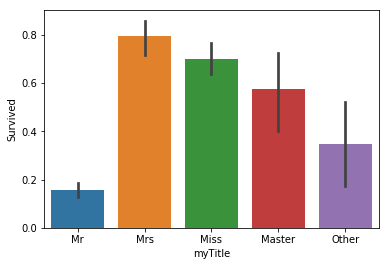

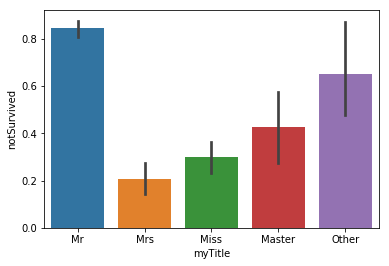

In [11]:
plt.figure()
trainData['notSurvived'] = np.ones(891) - trainData['Survived'].values; 
plt.show(sns.barplot(x= 'myTitle', y= 'Survived',  data=trainData))
plt.figure()
plt.show(sns.barplot(x= 'myTitle', y='notSurvived',  data=trainData))
trainData = trainData.drop('notSurvived', axis = 1)

2.2

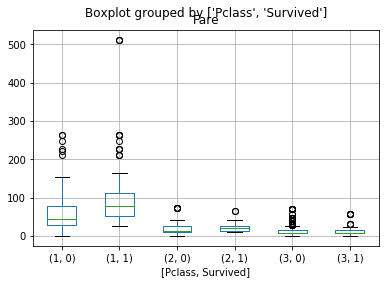

In [12]:
plt.show(trainData.boxplot(column = 'Fare' ,by = ['Pclass', 'Survived']))

2.3

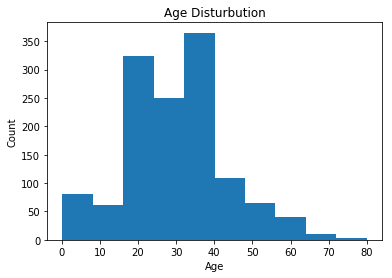

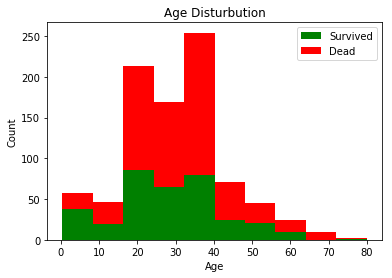

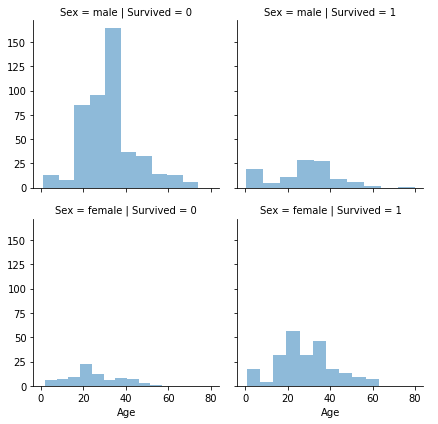

In [13]:
plt.hist(mergedData['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Disturbution')
plt.show()
plt.hist(x=[mergedData[mergedData['Survived'] == 1]['Age'], mergedData[mergedData['Survived'] == 0]['Age']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Disturbution')
plt.show()
s = sns.FacetGrid(trainData, row='Sex', col='Survived')
s.map(plt.hist, 'Age', alpha=0.5)
s.add_legend()
plt.show(s)

2.4

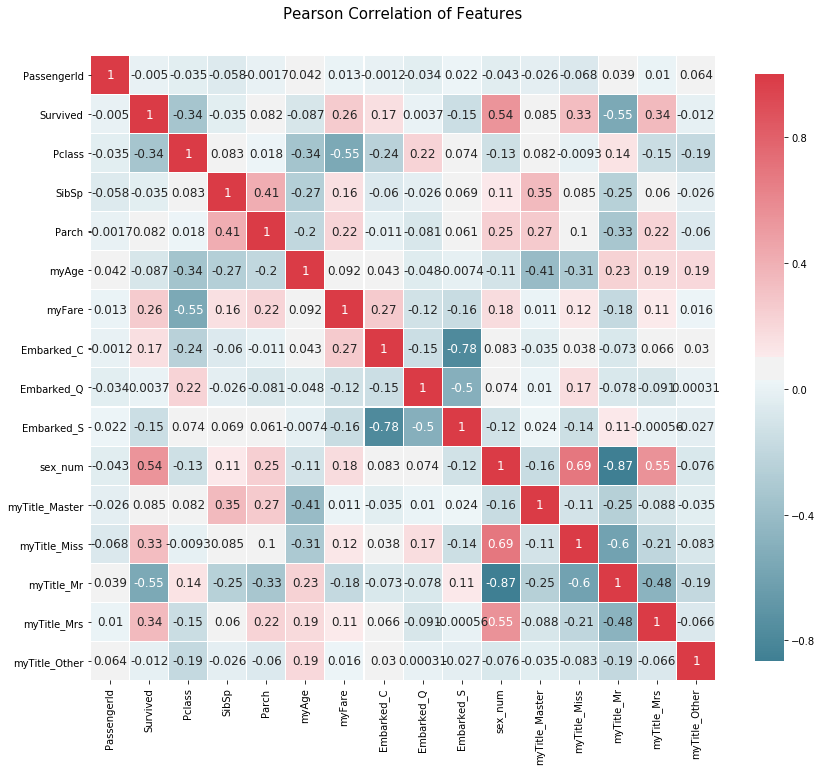

In [14]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
trainDatan = trainDatan.drop('Age', axis = 1)
trainDatan = trainDatan.drop('Fare', axis = 1)
correlation_heatmap(trainDatan)

3.1

In [15]:
trainData['who'] = (trainData['Age'] > 18)*1 + (trainDatan['sex_num'])
dic = {1 : 'man', 2 : 'woman', 0 : 'child'}
trainData['who'] = trainData['who'].map(dic)
display(trainData.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,myTitle,myAge,myFare,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,22.0,7.2500,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,38.0,71.2833,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,26.0,7.9250,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,35.0,53.1000,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,35.0,8.0500,man


3.2

In [16]:
trainData['Companion'] = trainData['Parch'] + trainData['SibSp']
mergedData['Companion'] = mergedData['Parch'] + mergedData['SibSp']

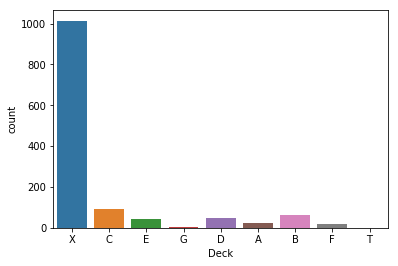

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


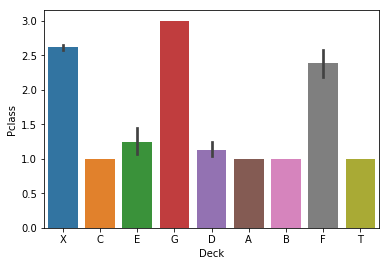

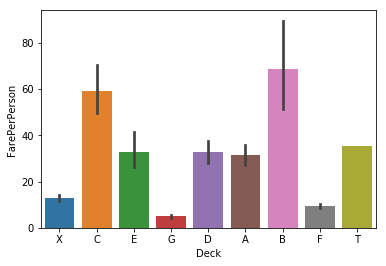

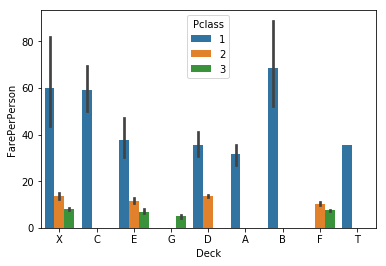

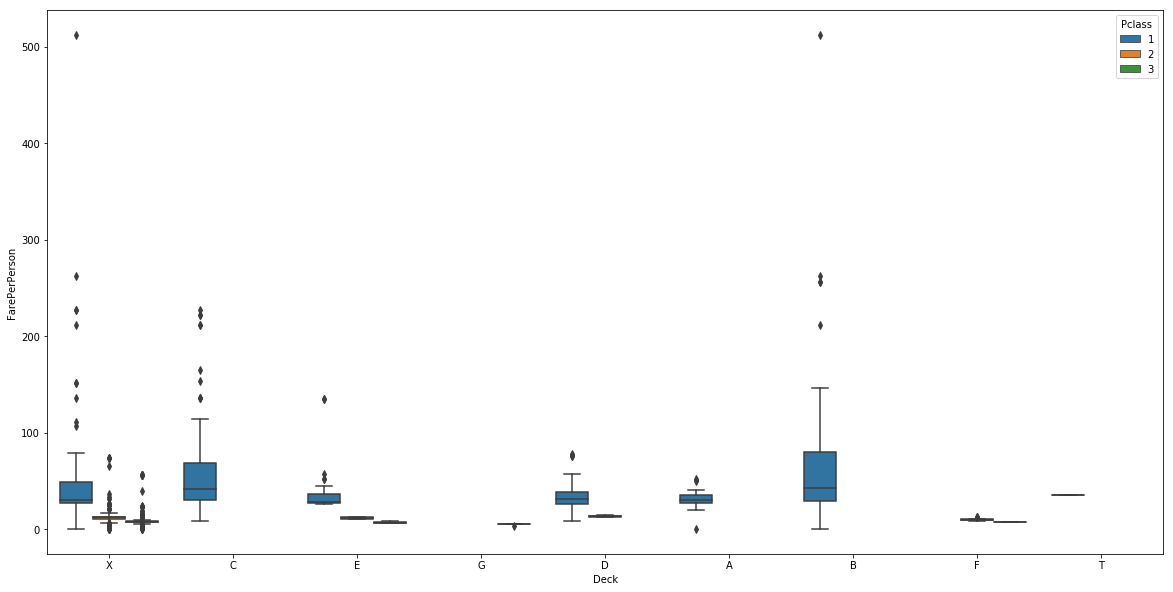

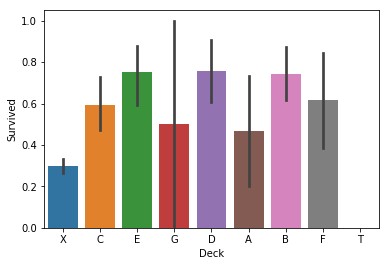

In [17]:
import re
mergedData['Cabin'] = mergedData['Cabin'].fillna("X")
mergedData['Deck'] = mergedData['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
mergedData['FarePerPerson'] = mergedData['Fare'].values / (mergedData['Companion'].values + 1)
plt.show(sns.countplot(x = 'Deck', data = mergedData))
plt.show(sns.barplot(x = 'Deck', y = 'Pclass', data = mergedData))
plt.show(sns.barplot(x = 'Deck', y = 'FarePerPerson', data = mergedData))
plt.show(sns.barplot(x = 'Deck', y = 'FarePerPerson', hue = 'Pclass', data = mergedData))
plt.figure(figsize = (20,10))
plt.show(sns.boxplot(x = 'Deck', y = 'FarePerPerson', hue = 'Pclass', data = mergedData))
plt.show(sns.barplot(x = 'Deck', y = 'Survived', data = mergedData))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


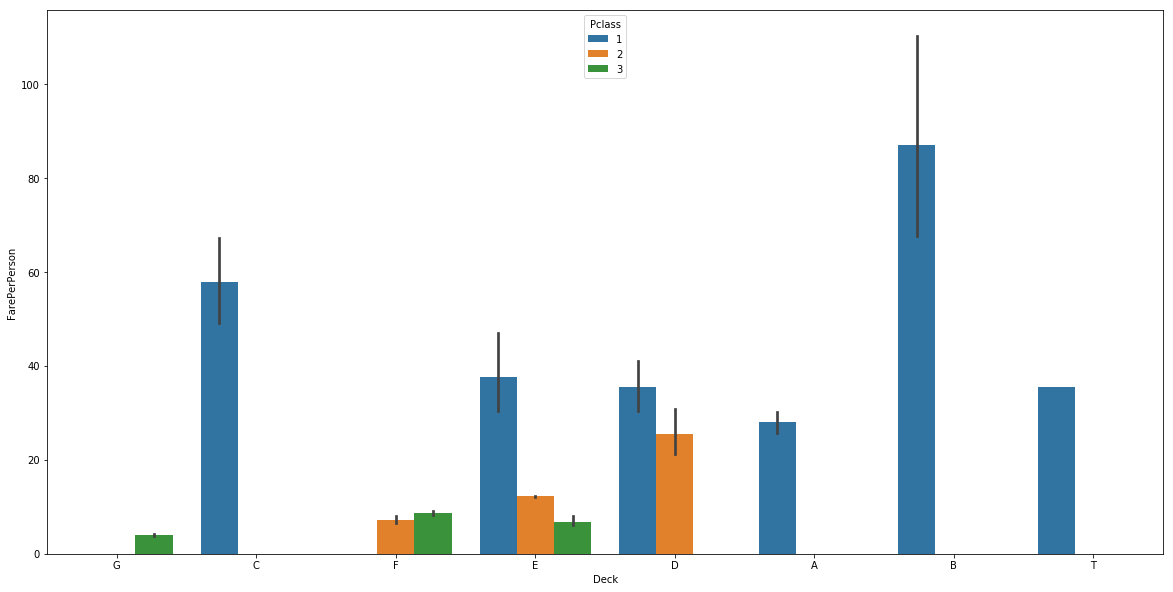

In [18]:
for i in range(len(mergedData)) : 
    if (mergedData['Deck'].loc[i] == 'X') : 
        if (mergedData['Pclass'].loc[i] == 1) : 
            if (mergedData['FarePerPerson'].loc[i] > 60) :
                mergedData['Deck'].loc[i] = 'B'
            if (mergedData['FarePerPerson'].loc[i] > 40 and mergedData['FarePerPerson'].loc[i] <= 60) :
                mergedData['Deck'].loc[i] = 'C'
            if (mergedData['FarePerPerson'].loc[i] <= 40) :
                mergedData['Deck'].loc[i] = 'A'
        if (mergedData['Pclass'].loc[i] == 2) :
            if (mergedData['FarePerPerson'].loc[i] > 15) :
                mergedData['Deck'].loc[i] = 'D'
            if (mergedData['FarePerPerson'].loc[i] > 10 and mergedData['FarePerPerson'].loc[i] <= 15) :
                mergedData['Deck'].loc[i] = 'E'
            if (mergedData['FarePerPerson'].loc[i] <= 10) :
                mergedData['Deck'].loc[i] = 'F'
        if (mergedData['Pclass'].loc[i] == 3) :
            if (mergedData['FarePerPerson'].loc[i] > 5) :
                mergedData['Deck'].loc[i] = 'F'
            if (mergedData['FarePerPerson'].loc[i] <= 5) :
                mergedData['Deck'].loc[i] = 'G'
plt.figure(figsize = (20,10))
plt.show(sns.barplot(x = 'Deck', y = 'FarePerPerson', hue = 'Pclass', data = mergedData))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


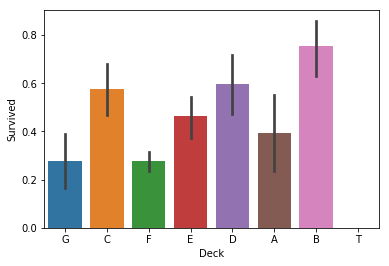

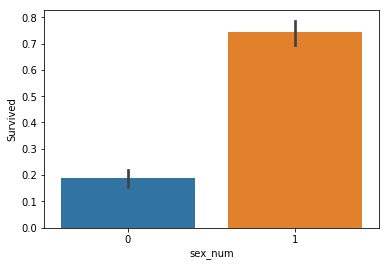

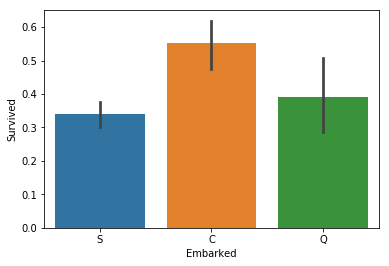

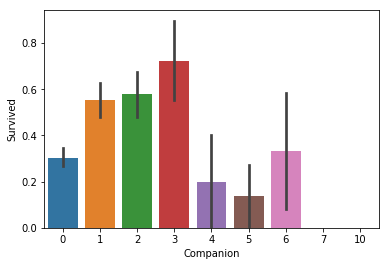

In [19]:
plt.show(sns.barplot(x = 'Deck', y = 'Survived', data = mergedData))
plt.show(sns.barplot(x = 'sex_num', y = 'Survived', data = mergedDatan))
plt.show(sns.barplot(x = 'Embarked', y = 'Survived', data = mergedData))
plt.show(sns.barplot(x = 'Companion', y = 'Survived', data = mergedData))

4

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


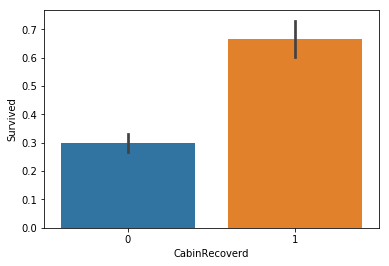

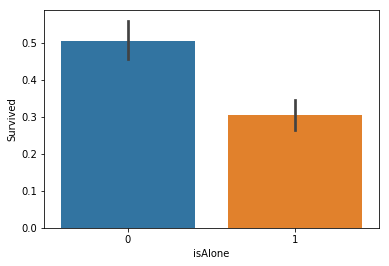

In [20]:
mergedData['Cabin'] = mergedData['Cabin'].fillna("X")
mergedData['CabinRecoverd'] = 1*(mergedData['Cabin'] != 'X')
mergedData['isAlone'] = 1*(mergedData['Companion'] == 0)
trainData['Cabin'] = trainData['Cabin'].fillna("X")
trainData['CabinRecoverd'] = 1*(trainData['Cabin'] != 'X')
plt.show(sns.barplot(x = 'CabinRecoverd', y = 'Survived', data = trainData))
trainData['isAlone'] = 1*(trainData['Companion'] == 0)
plt.show(sns.barplot(x = 'isAlone', y = 'Survived', data = trainData))

In [21]:
mergedDatan['Deck'] = mergedData['Deck']
mergedDatan = mergedDatan.drop('Title', axis = 1)
mergedDatan = mergedDatan.drop('PassengerId', axis = 1)
mergedDatan = mergedDatan.drop('Cabin', axis = 1)
mergedDatan = pd.get_dummies(mergedDatan, columns=["Deck"])
mergedDatan['Companion'] = mergedData['Companion']
mergedDatan['FarePerPerson'] = mergedData['FarePerPerson']
mergedDatan['CabinRecoverd'] = mergedData['CabinRecoverd']
mergedDatan['isAlone'] = mergedData['isAlone']
display(mergedDatan.head())
trainDatan = mergedDatan.loc[0:len(trainData)]
testDatan = mergedDatan.loc[len(trainData):len(testData)]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,sex_num,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Companion,FarePerPerson,CabinRecoverd,isAlone
0,0.0,3,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,1,0,1,3.62500,0,0
1,1.0,1,38.0,1,0,71.2833,1,0,0,1,...,1,0,0,0,0,0,1,35.64165,1,0
2,1.0,3,26.0,0,0,7.9250,0,0,1,1,...,0,0,0,1,0,0,0,7.92500,0,1
3,1.0,1,35.0,1,0,53.1000,0,0,1,1,...,1,0,0,0,0,0,1,26.55000,1,0
4,0.0,3,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,1,0,0,0,8.05000,0,1


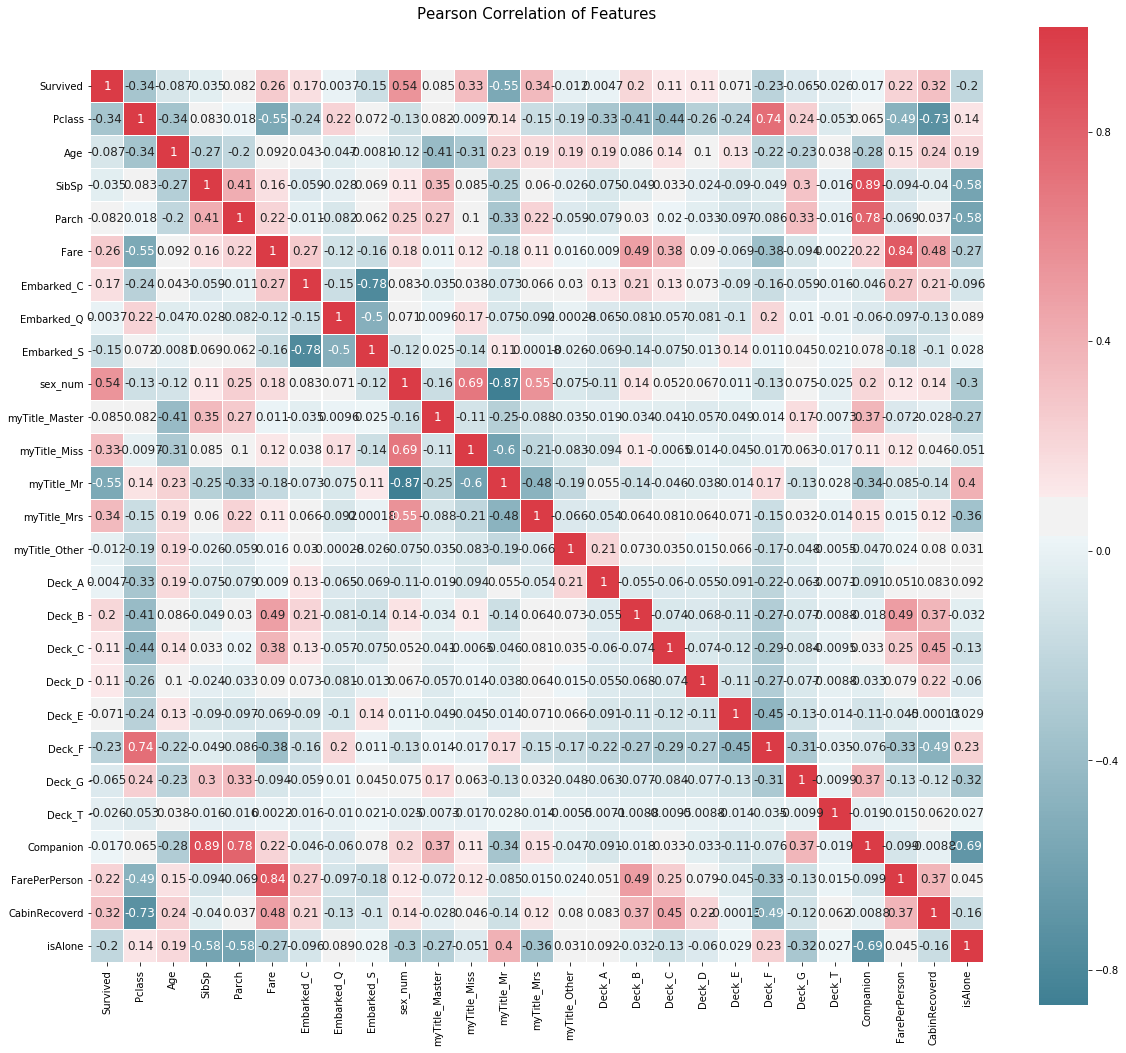

In [24]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 20))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
correlation_heatmap(trainDatan)